<a href="https://colab.research.google.com/github/HarshanBathini/Skin-cancer-project.ipynb/blob/main/Copy_of_Skincaner_projectfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ISIC Skin Cancer Data Analysis Project - Google Colab**

📋 Table of Contents
Environment Setup

Data Loading and Overview

Data Cleaning and Preprocessing

Exploratory Data Analysis

Statistical Analysis

Data Visualization

Feature Engineering

Insights and Conclusions


**This dataset contains**

1.120,000 synthetic records based on real ISIC patterns with 25 comprehensive features including:

2.Patient demographics (age, sex)

3.Lesion characteristics (type, size, location)

4.Image metadata (dimensions, quality)

5.Clinical features (asymmetry, border irregularity, color variation)

6.Diagnostic information (malignant/benign classification)

In [ ]:
# Step 1: Import fundamental libraries for data manipulation
import pandas as pd                    # For data manipulation and analysis
import numpy as np                     # For numerical operations
import matplotlib.pyplot as plt        # For creating static visualizations
import seaborn as sns                  # For statistical data visualization

# Step 2: Import libraries for advanced data analysis
from scipy import stats               # For statistical functions and tests
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For data preprocessing
from sklearn.decomposition import PCA  # For dimensionality reduction
import warnings                       # To handle warning messages
warnings.filterwarnings('ignore')    # Suppress warning messages for cleaner output

# Step 3: Set display options for better data viewing
pd.set_option('display.max_columns', None)    # Show all columns in DataFrame
pd.set_option('display.width', None)          # Don't wrap DataFrame display
pd.set_option('display.max_colwidth', 100)    # Set maximum column width

# Step 4: Configure matplotlib for better plots
plt.style.use('default')


In [ ]:
print("📂 Loading ISIC Skin Cancer Dataset...")
df = pd.read_csv('/content/isic_skin_cancer_dataset_large.csv')

📂 Loading ISIC Skin Cancer Dataset...


In [ ]:
print(f"📊 Dataset shape: {df.shape}")

📊 Dataset shape: (120000, 25)


In [ ]:
print(f"📋 Total records: {df.shape[0]:,}")

📋 Total records: 120,000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   image_id                  120000 non-null  object 
 1   patient_id                120000 non-null  object 
 2   image_path                120000 non-null  object 
 3   lesion_type               120000 non-null  object 
 4   malignant                 120000 non-null  int64  
 5   age                       120000 non-null  int64  
 6   sex                       120000 non-null  object 
 7   anatomical_site           120000 non-null  object 
 8   lesion_diameter_mm        120000 non-null  float64
 9   image_width               120000 non-null  int64  
 10  image_height              120000 non-null  int64  
 11  mean_red_value            120000 non-null  int64  
 12  mean_green_value          120000 non-null  int64  
 13  mean_blue_value           120000 non-null  i

In [ ]:
df.describe()

,malignant,age,lesion_diameter_mm,image_width,image_height,mean_red_value,mean_green_value,mean_blue_value,asymmetry_score,border_irregularity,color_variation,follow_up_available,histopathology_confirmed
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,0.220575,57.871292,5.997619,1221.815442,1226.651600,124.420942,104.377392,84.426617,0.286598,0.428455,0.450656,0.699275,0.599908
std,0.414636,21.453979,4.237317,476.613416,475.715017,43.326436,43.278546,37.481075,0.160471,0.174905,0.368538,0.458575,0.489919
min,0.000000,0.000000,0.000000,400.000000,400.000000,50.000000,30.000000,20.000000,0.001000,0.005000,0.000000,0.000000,0.000000
25%,0.000000,44.000000,2.900000,810.000000,813.000000,87.000000,67.000000,52.000000,0.161000,0.296000,0.182000,0.000000,0.000000
50%,0.000000,60.000000,5.000000,1220.000000,1231.000000,124.000000,104.000000,85.000000,0.265000,0.421000,0.355000,1.000000,1.000000
75%,0.000000,75.000000,8.100000,1635.000000,1639.000000,162.000000,142.000000,117.000000,0.391000,0.553000,0.614000,1.000000,1.000000
max,1.000000,94.000000,49.200000,2047.000000,2047.000000,199.000000,179.000000,149.000000,0.945000,0.980000,3.694000,1.000000,1.000000


In [ ]:
df.shape

(120000, 25)

In [ ]:
print(f"📋 Total features: {df.shape}")

📋 Total features: (120000, 25)


In [ ]:
print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

💾 Memory usage: 93.04 MB


2.2 Initial Data Exploration

In [ ]:
# Step 1: Display first few rows to understand data structure
print("🔍 First 5 rows of the dataset:")
print("=" * 80)
display(df.head())

🔍 First 5 rows of the dataset:


,image_id,patient_id,image_path,lesion_type,malignant,age,sex,anatomical_site,lesion_diameter_mm,image_width,image_height,mean_red_value,mean_green_value,mean_blue_value,asymmetry_score,border_irregularity,color_variation,elevation,surface_texture,follow_up_available,histopathology_confirmed,image_quality,lighting_conditions,dataset_source,acquisition_date
0,ISIC_0000000,PAT_000000,images/ISIC_0000000.jpg,basal_cell_carcinoma,1,55,female,neck,13.9,866,1638,51,117,57,0.378,0.330,0.155,flat,warty,1,1,excellent,suboptimal,ISIC_2024_synthetic,2020-01-14
1,ISIC_0000001,PAT_000000,images/ISIC_0000001.jpg,nevus,0,69,male,trunk,10.8,1355,1878,130,79,123,0.491,0.390,0.901,raised,smooth,1,1,poor,good,ISIC_2024_synthetic,2020-12-03
2,ISIC_0000002,PAT_000000,images/ISIC_0000002.jpg,benign_keratosis,0,73,male,face,1.1,920,1767,130,165,52,0.140,0.631,0.315,raised,rough,0,1,excellent,suboptimal,ISIC_2024_synthetic,2021-10-04
3,ISIC_0000003,PAT_000001,images/ISIC_0000003.jpg,nevus,0,74,female,upper_extremity,1.3,1977,1291,192,58,55,0.272,0.619,0.257,flat,warty,1,0,excellent,suboptimal,ISIC_2024_synthetic,2023-11-09
4,ISIC_0000004,PAT_000001,images/ISIC_0000004.jpg,nevus,0,60,male,trunk,17.0,1834,1048,108,147,115,0.304,0.283,0.225,raised,rough,1,1,good,good,ISIC_2024_synthetic,2020-07-21


In [ ]:
# Step 2: Display last few rows
print("\n🔍 Last 5 rows of the dataset:")
print("=" * 80)
display(df.tail())


🔍 Last 5 rows of the dataset:


,image_id,patient_id,image_path,lesion_type,malignant,age,sex,anatomical_site,lesion_diameter_mm,image_width,image_height,mean_red_value,mean_green_value,mean_blue_value,asymmetry_score,border_irregularity,color_variation,elevation,surface_texture,follow_up_available,histopathology_confirmed,image_quality,lighting_conditions,dataset_source,acquisition_date
119995,ISIC_0119995,PAT_039998,images/ISIC_0119995.jpg,nevus,0,75,female,hand,7.8,1509,1364,101,166,109,0.152,0.410,0.068,flat,warty,1,0,good,good,ISIC_2024_synthetic,2021-03-03
119996,ISIC_0119996,PAT_039998,images/ISIC_0119996.jpg,nevus,0,24,male,chest,13.0,1313,2029,110,69,119,0.500,0.084,0.741,flat,smooth,1,1,good,optimal,ISIC_2024_synthetic,2020-08-18
119997,ISIC_0119997,PAT_039999,images/ISIC_0119997.jpg,seborrheic_keratosis,0,64,male,lower_extremity,2.0,947,824,51,129,109,0.243,0.372,0.591,flat,warty,1,0,fair,optimal,ISIC_2024_synthetic,2022-12-31
119998,ISIC_0119998,PAT_039999,images/ISIC_0119998.jpg,nevus,0,49,female,lower_extremity,12.3,2031,760,197,85,77,0.336,0.698,1.083,raised,smooth,1,1,fair,optimal,ISIC_2024_synthetic,2021-03-10
119999,ISIC_0119999,PAT_039999,images/ISIC_0119999.jpg,nevus,0,92,male,lower_extremity,3.4,1259,1055,174,72,136,0.123,0.539,0.398,flat,smooth,1,1,good,good,ISIC_2024_synthetic,2020-10-16


In [ ]:
print("\n🔍 Random sample of 5 rows:")
print("=" * 80)
display(df.sample(5, random_state=42))


🔍 Random sample of 5 rows:


,image_id,patient_id,image_path,lesion_type,malignant,age,sex,anatomical_site,lesion_diameter_mm,image_width,image_height,mean_red_value,mean_green_value,mean_blue_value,asymmetry_score,border_irregularity,color_variation,elevation,surface_texture,follow_up_available,histopathology_confirmed,image_quality,lighting_conditions,dataset_source,acquisition_date
71787,ISIC_0071787,PAT_023929,images/ISIC_0071787.jpg,nevus,0,62,female,trunk,11.0,788,1189,173,167,69,0.192,0.482,0.743,flat,warty,0,1,excellent,optimal,ISIC_2024_synthetic,2023-08-08
67218,ISIC_0067218,PAT_022406,images/ISIC_0067218.jpg,seborrheic_keratosis,0,57,female,trunk,7.5,1539,1837,74,49,41,0.383,0.396,0.225,flat,rough,1,0,good,good,ISIC_2024_synthetic,2022-07-24
54066,ISIC_0054066,PAT_018022,images/ISIC_0054066.jpg,nevus,0,42,male,lower_extremity,4.6,777,474,186,133,81,0.124,0.640,0.354,flat,smooth,1,0,good,optimal,ISIC_2024_synthetic,2022-07-26
7168,ISIC_0007168,PAT_002389,images/ISIC_0007168.jpg,nevus,0,91,male,neck,9.3,1671,456,165,79,33,0.063,0.186,0.491,flat,smooth,1,1,poor,optimal,ISIC_2024_synthetic,2020-04-30
29618,ISIC_0029618,PAT_009872,images/ISIC_0029618.jpg,dermatofibroma,0,40,male,neck,2.6,1177,646,76,38,122,0.168,0.460,0.777,raised,rough,0,1,good,good,ISIC_2024_synthetic,2021-06-19


In [ ]:
print("ℹ️ Dataset Information:")
print("=" * 50)
print(df.info())

ℹ️ Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   image_id                  120000 non-null  object 
 1   patient_id                120000 non-null  object 
 2   image_path                120000 non-null  object 
 3   lesion_type               120000 non-null  object 
 4   malignant                 120000 non-null  int64  
 5   age                       120000 non-null  int64  
 6   sex                       120000 non-null  object 
 7   anatomical_site           120000 non-null  object 
 8   lesion_diameter_mm        120000 non-null  float64
 9   image_width               120000 non-null  int64  
 10  image_height              120000 non-null  int64  
 11  mean_red_value            120000 non-null  int64  
 12  mean_green_value          120000 non-null  int64  
 13  mean_blue_value     

In [ ]:
print("\n📊 Data types summary:")
print("=" * 30)
print(df.dtypes.value_counts())


📊 Data types summary:
object     12
int64       9
float64     4
Name: count, dtype: int64


In [ ]:
# Step 3: Get statistical summary of numerical columns
print("\n📈 Statistical Summary (Numerical Columns):")
print("=" * 50)
display(df.describe())


📈 Statistical Summary (Numerical Columns):


,malignant,age,lesion_diameter_mm,image_width,image_height,mean_red_value,mean_green_value,mean_blue_value,asymmetry_score,border_irregularity,color_variation,follow_up_available,histopathology_confirmed
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,0.220575,57.871292,5.997619,1221.815442,1226.651600,124.420942,104.377392,84.426617,0.286598,0.428455,0.450656,0.699275,0.599908
std,0.414636,21.453979,4.237317,476.613416,475.715017,43.326436,43.278546,37.481075,0.160471,0.174905,0.368538,0.458575,0.489919
min,0.000000,0.000000,0.000000,400.000000,400.000000,50.000000,30.000000,20.000000,0.001000,0.005000,0.000000,0.000000,0.000000
25%,0.000000,44.000000,2.900000,810.000000,813.000000,87.000000,67.000000,52.000000,0.161000,0.296000,0.182000,0.000000,0.000000
50%,0.000000,60.000000,5.000000,1220.000000,1231.000000,124.000000,104.000000,85.000000,0.265000,0.421000,0.355000,1.000000,1.000000
75%,0.000000,75.000000,8.100000,1635.000000,1639.000000,162.000000,142.000000,117.000000,0.391000,0.553000,0.614000,1.000000,1.000000
max,1.000000,94.000000,49.200000,2047.000000,2047.000000,199.000000,179.000000,149.000000,0.945000,0.980000,3.694000,1.000000,1.000000


In [ ]:
# Step 4: Get statistical summary of categorical columns
print("\n📈 Statistical Summary (Categorical Columns):")
print("=" * 50)
display(df.describe(include='object'))


📈 Statistical Summary (Categorical Columns):


,image_id,patient_id,image_path,lesion_type,sex,anatomical_site,elevation,surface_texture,image_quality,lighting_conditions,dataset_source,acquisition_date
count,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000,120000
unique,120000,40000,120000,9,2,14,3,4,4,3,1,1460
top,ISIC_0119983,PAT_039983,images/ISIC_0119983.jpg,nevus,female,trunk,flat,smooth,good,optimal,ISIC_2024_synthetic,2020-11-24
freq,1,3,1,53878,65725,29999,71863,59922,47961,60069,120000,111


2.4 Column Analysis

In [ ]:
# Step 1: List all column names
print("📋 All column names in the dataset:")
print("=" * 40)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

📋 All column names in the dataset:
 1. image_id
 2. patient_id
 3. image_path
 4. lesion_type
 5. malignant
 6. age
 7. sex
 8. anatomical_site
 9. lesion_diameter_mm
10. image_width
11. image_height
12. mean_red_value
13. mean_green_value
14. mean_blue_value
15. asymmetry_score
16. border_irregularity
17. color_variation
18. elevation
19. surface_texture
20. follow_up_available
21. histopathology_confirmed
22. image_quality
23. lighting_conditions
24. dataset_source
25. acquisition_date


In [ ]:
# Step 2: Categorize columns by type
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print(f"\n🔢 Numerical columns ({len(numerical_columns)}):")
for col in numerical_columns:
    print(f"   • {col}")

print(f"\n📝 Categorical columns ({len(categorical_columns)}):")
for col in categorical_columns:
    print(f"   • {col}")


🔢 Numerical columns (13):
   • malignant
   • age
   • lesion_diameter_mm
   • image_width
   • image_height
   • mean_red_value
   • mean_green_value
   • mean_blue_value
   • asymmetry_score
   • border_irregularity
   • color_variation
   • follow_up_available
   • histopathology_confirmed

📝 Categorical columns (12):
   • image_id
   • patient_id
   • image_path
   • lesion_type
   • sex
   • anatomical_site
   • elevation
   • surface_texture
   • image_quality
   • lighting_conditions
   • dataset_source
   • acquisition_date


3. Data Cleaning and Preprocessing

In [ ]:
print("🔍 Missing Values Analysis:")
print("=" * 40)

missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100


🔍 Missing Values Analysis:


In [ ]:
# Create a summary DataFrame
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing_values,
    'Missing_Percentage': missing_percentage
})

In [ ]:
# Step 2: Display missing values summary
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0]
if len(missing_summary) > 0:
    print("⚠️ Columns with missing values:")
    display(missing_summary.sort_values('Missing_Count', ascending=False))
else:
    print("✅ No missing values found in the dataset!")


✅ No missing values found in the dataset!


In [ ]:
# Step 3: Check for any null values in critical columns
critical_columns = ['lesion_type', 'malignant', 'age', 'sex']
print(f"\n🔧 Missing values in critical columns:")
for col in critical_columns:
    if col in df.columns:
        missing_count = df[col].isnull().sum()
        print(f"   • {col}: {missing_count} missing values")


🔧 Missing values in critical columns:
   • lesion_type: 0 missing values
   • malignant: 0 missing values
   • age: 0 missing values
   • sex: 0 missing values


In [ ]:
#Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"🔍 Duplicate Analysis:")
print(f"   • Total duplicate rows: {duplicate_rows}")

🔍 Duplicate Analysis:
   • Total duplicate rows: 0


In [ ]:
#Check for duplicate image IDs (should be unique)
if 'image_id' in df.columns:
    duplicate_image_ids = df['image_id'].duplicated().sum()
    print(f"   • Duplicate image IDs: {duplicate_image_ids}")

   • Duplicate image IDs: 0


In [ ]:
#Check for duplicate patient records
if 'patient_id' in df.columns:
    duplicate_patients = df['patient_id'].duplicated().sum()
    print(f"   • Duplicate patient IDs: {duplicate_patients}")
    print(f"   • Unique patients: {df['patient_id'].nunique()}")

   • Duplicate patient IDs: 80000
   • Unique patients: 40000


In [ ]:
#Display any duplicates if found
if duplicate_rows > 0:
    print("\n⚠️ Sample duplicate rows:")
    display(df[df.duplicated()].head())
else:
    print("✅ No duplicate rows found!")

✅ No duplicate rows found!


3.3 Data Type Conversions

In [ ]:
#Convert categorical columns to appropriate types
print("🔄 Converting data types...")


🔄 Converting data types...


In [ ]:
# Convert malignant column to categorical
if 'malignant' in df.columns:
    df['malignant'] = df['malignant'].astype('category')
    print("   ✅ Converted 'malignant' to category")

   ✅ Converted 'malignant' to category


In [ ]:
# Convert lesion_type to categorical
if 'lesion_type' in df.columns:
    df['lesion_type'] = df['lesion_type'].astype('category')
    print("   ✅ Converted 'lesion_type' to category")

   ✅ Converted 'lesion_type' to category


In [ ]:
# Convert sex to categorical
if 'sex' in df.columns:
    df['sex'] = df['sex'].astype('category')
    print("   ✅ Converted 'sex' to category")

   ✅ Converted 'sex' to category


In [ ]:
# Convert acquisition_date to datetime
if 'acquisition_date' in df.columns:
    df['acquisition_date'] = pd.to_datetime(df['acquisition_date'])
    print("   ✅ Converted 'acquisition_date' to datetime")

   ✅ Converted 'acquisition_date' to datetime


In [ ]:
#Verify data type conversions
print("\n📊 Updated data types:")
print(df.dtypes)


📊 Updated data types:
image_id                            object
patient_id                          object
image_path                          object
lesion_type                       category
malignant                         category
age                                  int64
sex                               category
anatomical_site                     object
lesion_diameter_mm                 float64
image_width                          int64
image_height                         int64
mean_red_value                       int64
mean_green_value                     int64
mean_blue_value                      int64
asymmetry_score                    float64
border_irregularity                float64
color_variation                    float64
elevation                           object
surface_texture                     object
follow_up_available                  int64
histopathology_confirmed             int64
image_quality                       object
lighting_conditions            

3.4 Data Validation

In [ ]:
 #Validate age values
print("🔍 Data Validation:")
print("=" * 30)

if 'age' in df.columns:
    age_stats = df['age'].describe()
    print(f"Age statistics:")
    print(f"   • Min age: {age_stats['min']}")
    print(f"   • Max age: {age_stats['max']}")
    print(f"   • Mean age: {age_stats['mean']:.1f}")

🔍 Data Validation:
Age statistics:
   • Min age: 0.0
   • Max age: 94.0
   • Mean age: 57.9


In [ ]:
# Check for unrealistic ages
unrealistic_ages = df[(df['age'] < 0) | (df['age'] > 120)]
print(f"   • Unrealistic ages: {len(unrealistic_ages)}")

   • Unrealistic ages: 0


In [ ]:
 #Validate lesion diameter values
if 'lesion_diameter_mm' in df.columns:
    diameter_stats = df['lesion_diameter_mm'].describe()
    print(f"\nLesion diameter statistics:")
    print(f"   • Min diameter: {diameter_stats['min']:.1f} mm")
    print(f"   • Max diameter: {diameter_stats['max']:.1f} mm")
    print(f"   • Mean diameter: {diameter_stats['mean']:.1f} mm")



Lesion diameter statistics:
   • Min diameter: 0.0 mm
   • Max diameter: 49.2 mm
   • Mean diameter: 6.0 mm


In [ ]:
#Validate image dimensions
if 'image_width' in df.columns and 'image_height' in df.columns:
    print(f"\nImage dimension statistics:")
    print(f"   • Min width: {df['image_width'].min()}")
    print(f"   • Max width: {df['image_width'].max()}")
    print(f"   • Min height: {df['image_height'].min()}")
    print(f"   • Max height: {df['image_height'].max()}")


Image dimension statistics:
   • Min width: 400
   • Max width: 2047
   • Min height: 400
   • Max height: 2047


4. Exploratory Data Analysis

In [ ]:
 #Analyze the target variable (malignant vs benign)
print("🎯 Target Variable Analysis:")
print("=" * 40)

if 'malignant' in df.columns:
    # Count and percentage of malignant vs benign cases
    malignant_counts = df['malignant'].value_counts()
    malignant_percentages = df['malignant'].value_counts(normalize=True) * 100

    print("Malignant Distribution:")
    for value, count in malignant_counts.items():
        label = "Malignant" if value == 1 else "Benign"
        percentage = malignant_percentages[value]
        print(f"   • {label}: {count:,} ({percentage:.1f}%)")


🎯 Target Variable Analysis:
Malignant Distribution:
   • Benign: 93,531 (77.9%)
   • Malignant: 26,469 (22.1%)


In [ ]:
# Calculate class imbalance ratio
benign_count = malignant_counts[0] if 0 in malignant_counts else 0
malignant_count = malignant_counts[1] if 1 in malignant_counts else 0

if malignant_count > 0:
    imbalance_ratio = benign_count / malignant_count
    print(f"   • Class imbalance ratio: {imbalance_ratio:.2f}:1 (Benign:Malignant)")

   • Class imbalance ratio: 3.53:1 (Benign:Malignant)


In [ ]:
#Analyze lesion types distribution
print("🔬 Lesion Type Distribution:")
print("=" * 40)

if 'lesion_type' in df.columns:
    lesion_counts = df['lesion_type'].value_counts()
    lesion_percentages = df['lesion_type'].value_counts(normalize=True) * 100

    print(f"Total unique lesion types: {df['lesion_type'].nunique()}")
    print("\nDetailed breakdown:")

    for lesion_type, count in lesion_counts.items():
        percentage = lesion_percentages[lesion_type]
        print(f"   • {lesion_type}: {count:,} ({percentage:.1f}%)")


🔬 Lesion Type Distribution:
Total unique lesion types: 9

Detailed breakdown:
   • nevus: 53,878 (44.9%)
   • basal_cell_carcinoma: 14,409 (12.0%)
   • benign_keratosis: 11,986 (10.0%)
   • actinic_keratosis: 9,665 (8.1%)
   • melanoma: 9,664 (8.1%)
   • seborrheic_keratosis: 7,276 (6.1%)
   • dermatofibroma: 5,981 (5.0%)
   • vascular_lesion: 4,745 (4.0%)
   • squamous_cell_carcinoma: 2,396 (2.0%)


In [ ]:
print("\n📈 Age Analysis by Malignancy Status:")
print("=" * 50)

if 'age' in df.columns and 'malignant' in df.columns:
    age_by_malignancy = df.groupby('malignant')['age'].mean()

    print("Average age for malignant vs. benign cases:")
    if 0 in age_by_malignancy:
        print(f"   • Benign (0): {age_by_malignancy[0]:.1f} years")
    if 1 in age_by_malignancy:
        print(f"   • Malignant (1): {age_by_malignancy[1]:.1f} years")
else:
    print("   • 'age' or 'malignant' column not found.")


📈 Age Analysis by Malignancy Status:
Average age for malignant vs. benign cases:
   • Benign (0): 57.9 years
   • Malignant (1): 57.9 years


In [ ]:
 #Age distribution analysis
print("👥 Demographic Analysis:")
print("=" * 35)

if 'age' in df.columns:
    print("Age Distribution:")
    age_stats = df['age'].describe()

    for stat_name, value in age_stats.items():
        print(f"   • {stat_name.capitalize()}: {value:.1f} years")


👥 Demographic Analysis:
Age Distribution:
   • Count: 120000.0 years
   • Mean: 57.9 years
   • Std: 21.5 years
   • Min: 0.0 years
   • 25%: 44.0 years
   • 50%: 60.0 years
   • 75%: 75.0 years
   • Max: 94.0 years


In [ ]:
df['age_group'] = pd.cut(df['age'],
                            bins=[0, 20, 40, 60, 80, 120],
                            labels=['0-20', '21-40', '41-60', '61-80', '80+'])

age_group_counts = df['age_group'].value_counts().sort_index()
print(f"\nAge Group Distribution:")
for age_group, count in age_group_counts.items():
    percentage = (count / len(df)) * 100
    print(f"   • {age_group}: {count:,} ({percentage:.1f}%)")


Age Group Distribution:
   • 0-20: 5,881 (4.9%)
   • 21-40: 17,889 (14.9%)
   • 41-60: 36,118 (30.1%)
   • 61-80: 43,065 (35.9%)
   • 80+: 16,793 (14.0%)


In [ ]:
#Sex distribution analysis
if 'sex' in df.columns:
    print(f"\n👥 Sex Distribution:")
    sex_counts = df['sex'].value_counts()

    for sex, count in sex_counts.items():
        percentage = (count / len(df)) * 100
        print(f"   • {sex.capitalize()}: {count:,} ({percentage:.1f}%)")


👥 Sex Distribution:
   • Female: 65,725 (54.8%)
   • Male: 54,275 (45.2%)


In [ ]:
#Cross-analysis of age and malignancy
if 'age_group' in df.columns and 'malignant' in df.columns:
    print(f"\n📊 Malignancy Rate by Age Group:")
    age_malignancy = df.groupby('age_group')['malignant'].agg(['count', ('Malignant_Cases', lambda x: x.astype(int).sum()), ('Malignancy_Rate', lambda x: x.astype(int).mean())])
    age_malignancy['Malignancy_Rate'] = age_malignancy['Malignancy_Rate'] * 100

    for age_group, row in age_malignancy.iterrows():
        print(f"   • {age_group}: {row['Malignancy_Rate']:.1f}% ({int(row['Malignant_Cases']):,}/{int(row['count']):,})")


📊 Malignancy Rate by Age Group:
   • 0-20: 22.5% (1,325/5,881)
   • 21-40: 21.8% (3,908/17,889)
   • 41-60: 21.9% (7,895/36,118)
   • 61-80: 22.4% (9,653/43,065)
   • 80+: 21.6% (3,628/16,793)


Anatomical Site Analysis

In [ ]:
#Analyze lesion distribution by anatomical site
print("🗺️ Anatomical Site Analysis:")
print("=" * 40)

if 'anatomical_site' in df.columns:
    site_counts = df['anatomical_site'].value_counts()
    site_percentages = df['anatomical_site'].value_counts(normalize=True) * 100

    print(f"Total unique anatomical sites: {df['anatomical_site'].nunique()}")
    print("\nLesion distribution by body site:")

    for site, count in site_counts.items():
        percentage = site_percentages[site]
        print(f"   • {site.replace('_', ' ').title()}: {count:,} ({percentage:.1f}%)")

🗺️ Anatomical Site Analysis:
Total unique anatomical sites: 14

Lesion distribution by body site:
   • Trunk: 29,999 (25.0%)
   • Lower Extremity: 17,989 (15.0%)
   • Upper Extremity: 17,988 (15.0%)
   • Back: 14,199 (11.8%)
   • Face: 9,727 (8.1%)
   • Neck: 6,044 (5.0%)
   • Chest: 4,725 (3.9%)
   • Foot: 3,664 (3.1%)
   • Hand: 3,628 (3.0%)
   • Scalp: 3,623 (3.0%)
   • Abdomen: 2,431 (2.0%)
   • Palm: 2,402 (2.0%)
   • Sole: 2,369 (2.0%)
   • Nail: 1,212 (1.0%)


In [ ]:
#Analyze malignancy rate by anatomical site
if 'malignant' in df.columns:
    print(f"\n🗺️ Malignancy Rate by Anatomical Site:")
    print("=" * 45)

    # Convert 'malignant' to int before grouping for sum aggregation
    site_malignancy = df.groupby('anatomical_site')['malignant'].agg(['count', ('Malignant_Cases', lambda x: x.astype(int).sum())])
    site_malignancy['Malignancy_Rate'] = (site_malignancy['Malignant_Cases'] / site_malignancy['count']) * 100

    # Sort by malignancy rate
    site_malignancy = site_malignancy.sort_values('Malignancy_Rate', ascending=False)

    print("Anatomical sites ranked by malignancy rate:")
    for site, row in site_malignancy.iterrows():
        print(f"   • {site.replace('_', ' ').title()}: {row['Malignancy_Rate']:.1f}% ({int(row['Malignant_Cases']):,}/{int(row['count']):,})")


🗺️ Malignancy Rate by Anatomical Site:
Anatomical sites ranked by malignancy rate:
   • Scalp: 23.0% (832/3,623)
   • Abdomen: 23.0% (558/2,431)
   • Neck: 22.6% (1,368/6,044)
   • Hand: 22.6% (821/3,628)
   • Palm: 22.6% (542/2,402)
   • Sole: 22.4% (531/2,369)
   • Lower Extremity: 22.2% (3,992/17,989)
   • Nail: 22.1% (268/1,212)
   • Trunk: 22.1% (6,627/29,999)
   • Back: 22.0% (3,118/14,199)
   • Face: 21.7% (2,115/9,727)
   • Chest: 21.7% (1,025/4,725)
   • Upper Extremity: 21.6% (3,884/17,988)
   • Foot: 21.5% (788/3,664)


In [ ]:
# Sort by malignancy rate
site_malignancy = site_malignancy.sort_values('Malignancy_Rate', ascending=False)

print("Body sites ranked by malignancy rate:")
for site, row in site_malignancy.head(10).iterrows():
    site_name = site.replace('_', ' ').title()
    print(f"   • {site_name}: {row['Malignancy_Rate']:.1f}% ({int(row['Malignant_Cases'])}/{int(row['count'])})")

Body sites ranked by malignancy rate:
   • Scalp: 23.0% (832/3623)
   • Abdomen: 23.0% (558/2431)
   • Neck: 22.6% (1368/6044)
   • Hand: 22.6% (821/3628)
   • Palm: 22.6% (542/2402)
   • Sole: 22.4% (531/2369)
   • Lower Extremity: 22.2% (3992/17989)
   • Nail: 22.1% (268/1212)
   • Trunk: 22.1% (6627/29999)
   • Back: 22.0% (3118/14199)


Image Characteristics Analysis

In [ ]:
 #Analyze image dimensions
print("🖼️ Image Characteristics Analysis:")
print("=" * 45)

if 'image_width' in df.columns and 'image_height' in df.columns:
    print("Image Dimension Statistics:")

    # Width statistics
    width_stats = df['image_width'].describe()
    print(f"Image Width:")
    print(f"   • Mean: {width_stats['mean']:.0f} pixels")
    print(f"   • Median: {width_stats['50%']:.0f} pixels")
    print(f"   • Range: {width_stats['min']:.0f} - {width_stats['max']:.0f} pixels")

🖼️ Image Characteristics Analysis:
Image Dimension Statistics:
Image Width:
   • Mean: 1222 pixels
   • Median: 1220 pixels
   • Range: 400 - 2047 pixels


In [ ]:
# Height statistics
height_stats = df['image_height'].describe()
print(f"Image Height:")
print(f"   • Mean: {height_stats['mean']:.0f} pixels")
print(f"   • Median: {height_stats['50%']:.0f} pixels")
print(f"   • Range: {height_stats['min']:.0f} - {height_stats['max']:.0f} pixels")

Image Height:
   • Mean: 1227 pixels
   • Median: 1231 pixels
   • Range: 400 - 2047 pixels


In [ ]:
#Height statistics
height_stats = df['image_height'].describe()
print(f"Image Height:")
print(f"   • Mean: {height_stats['mean']:.0f} pixels")
print(f"   • Median: {height_stats['50%']:.0f} pixels")
print(f"   • Range: {height_stats['min']:.0f} - {height_stats['max']:.0f} pixels")

Image Height:
   • Mean: 1227 pixels
   • Median: 1231 pixels
   • Range: 400 - 2047 pixels


In [ ]:
#Analyze lesion size characteristics
if 'lesion_diameter_mm' in df.columns:
    print(f"\n📏 Lesion Size Analysis:")
    diameter_stats = df['lesion_diameter_mm'].describe()

    print(f"Lesion Diameter Statistics:")
    for stat_name, value in diameter_stats.items():
        print(f"   • {stat_name.capitalize()}: {value:.1f} mm")

    # Create size categories
    df['size_category'] = pd.cut(df['lesion_diameter_mm'],
                                bins=[0, 5, 10, 20, float('inf')],
                                labels=['Small (<5mm)', 'Medium (5-10mm)', 'Large (10-20mm)', 'Very Large (>20mm)'])

    size_counts = df['size_category'].value_counts()
    print(f"\nSize Category Distribution:")
    for category, count in size_counts.items():
        percentage = (count / len(df)) * 100
        print(f"   • {category}: {count:,} ({percentage:.1f}%)")


📏 Lesion Size Analysis:
Lesion Diameter Statistics:
   • Count: 120000.0 mm
   • Mean: 6.0 mm
   • Std: 4.2 mm
   • Min: 0.0 mm
   • 25%: 2.9 mm
   • 50%: 5.0 mm
   • 75%: 8.1 mm
   • Max: 49.2 mm

Size Category Distribution:
   • Small (<5mm): 60,076 (50.1%)
   • Medium (5-10mm): 41,581 (34.7%)
   • Large (10-20mm): 17,192 (14.3%)
   • Very Large (>20mm): 1,140 (0.9%)


5. Statistical Analysis
5.1 Correlation Analysis

In [ ]:
 #Calculate correlation matrix for numerical variables
print("📊 Correlation Analysis:")
print("=" * 35)

📊 Correlation Analysis:


In [ ]:
# Step 1: Calculate correlation matrix for numerical variables
print("📊 Correlation Analysis:")
print("=" * 35)

# Select numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numerical_cols) > 1:
    correlation_matrix = df[numerical_cols].corr()

    print(f"Correlation matrix calculated for {len(numerical_cols)} numerical variables")

    # Step 2: Find highly correlated pairs
    print(f"\n🔍 High Correlation Pairs (|r| > 0.5):")
    high_corr_pairs = []

    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.5:
                var1 = correlation_matrix.columns[i]
                var2 = correlation_matrix.columns[j]
                high_corr_pairs.append((var1, var2, corr_value))

    if high_corr_pairs:
        for var1, var2, corr in sorted(high_corr_pairs, key=lambda x: abs(x), reverse=True):
            print(f"   • {var1} ↔ {var2}: r = {corr:.3f}")
    else:
        print("   No highly correlated pairs found")

    # Step 3: Correlation with target variable
    if 'malignant' in correlation_matrix.columns:
        print(f"\n🎯 Correlation with Malignancy:")
        malignant_corr = correlation_matrix['malignant'].abs().sort_values(ascending=False)

        for variable, corr_value in malignant_corr.items():
            if variable != 'malignant' and abs(corr_value) > 0.1:
                print(f"   • {variable}: r = {correlation_matrix['malignant'][variable]:.3f}")


📊 Correlation Analysis:
Correlation matrix calculated for 12 numerical variables

🔍 High Correlation Pairs (|r| > 0.5):
   No highly correlated pairs found


5.2 Statistical Tests

In [ ]:
# Step 1: Test for difference in age between malignant and benign lesions
print("🧪 Statistical Hypothesis Tests:")
print("=" * 45)

if 'age' in df.columns and 'malignant' in df.columns:
    # Separate age data by malignancy status
    benign_ages = df[df['malignant'] == 0]['age'].dropna()
    malignant_ages = df[df['malignant'] == 1]['age'].dropna()

    # Perform t-test
    t_stat, p_value = stats.ttest_ind(malignant_ages, benign_ages)

    print("Age Difference Test (Malignant vs Benign):")
    print(f"   • Benign lesions - Mean age: {benign_ages.mean():.1f} ± {benign_ages.std():.1f} years")
    print(f"   • Malignant lesions - Mean age: {malignant_ages.mean():.1f} ± {malignant_ages.std():.1f} years")
    print(f"   • T-statistic: {t_stat:.3f}")
    print(f"   • P-value: {p_value:.6f}")

    if p_value < 0.05:
        print(f"   • Result: Significant difference in age (p < 0.05)")
    else:
        print(f"   • Result: No significant difference in age (p ≥ 0.05)")

# Step 2: Test for difference in lesion size
if 'lesion_diameter_mm' in df.columns and 'malignant' in df.columns:
    benign_sizes = df[df['malignant'] == 0]['lesion_diameter_mm'].dropna()
    malignant_sizes = df[df['malignant'] == 1]['lesion_diameter_mm'].dropna()

    # Perform t-test
    t_stat, p_value = stats.ttest_ind(malignant_sizes, benign_sizes)

    print(f"\nLesion Size Difference Test (Malignant vs Benign):")
    print(f"   • Benign lesions - Mean size: {benign_sizes.mean():.1f} ± {benign_sizes.std():.1f} mm")
    print(f"   • Malignant lesions - Mean size: {malignant_sizes.mean():.1f} ± {malignant_sizes.std():.1f} mm")
    print(f"   • T-statistic: {t_stat:.3f}")
    print(f"   • P-value: {p_value:.6f}")

    if p_value < 0.05:
        print(f"   • Result: Significant difference in size (p < 0.05)")
    else:
        print(f"   • Result: No significant difference in size (p ≥ 0.05)")

# Step 3: Chi-square test for sex and malignancy
if 'sex' in df.columns and 'malignant' in df.columns:
    contingency_table = pd.crosstab(df['sex'], df['malignant'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    print(f"\nSex vs Malignancy Association Test:")
    print(f"   • Chi-square statistic: {chi2:.3f}")
    print(f"   • P-value: {p_value:.6f}")
    print(f"   • Degrees of freedom: {dof}")

    if p_value < 0.05:
        print(f"   • Result: Significant association between sex and malignancy (p < 0.05)")
    else:
        print(f"   • Result: No significant association (p ≥ 0.05)")


🧪 Statistical Hypothesis Tests:
Age Difference Test (Malignant vs Benign):
   • Benign lesions - Mean age: 57.9 ± 21.4 years
   • Malignant lesions - Mean age: 57.9 ± 21.5 years
   • T-statistic: 0.194
   • P-value: 0.845931
   • Result: No significant difference in age (p ≥ 0.05)

Lesion Size Difference Test (Malignant vs Benign):
   • Benign lesions - Mean size: 6.0 ± 4.2 mm
   • Malignant lesions - Mean size: 6.0 ± 4.2 mm
   • T-statistic: 0.780
   • P-value: 0.435302
   • Result: No significant difference in size (p ≥ 0.05)

Sex vs Malignancy Association Test:
   • Chi-square statistic: 0.663
   • P-value: 0.415517
   • Degrees of freedom: 1
   • Result: No significant association (p ≥ 0.05)


5.3 Distribution Analysis

In [ ]:
# Step 1: Test for normality of continuous variables
print("📈 Distribution Analysis:")
print("=" * 35)

continuous_vars = ['age', 'lesion_diameter_mm', 'asymmetry_score', 'border_irregularity', 'color_variation']

for var in continuous_vars:
    if var in df.columns:
        # Shapiro-Wilk test for normality (use sample for large datasets)
        sample_data = df[var].dropna().sample(min(5000, len(df[var].dropna())), random_state=42)
        stat, p_value = stats.shapiro(sample_data)

        print(f"{var.replace('_', ' ').title()}:")
        print(f"   • Shapiro-Wilk statistic: {stat:.4f}")
        print(f"   • P-value: {p_value:.2e}")

        if p_value < 0.05:
            print(f"   • Distribution: Non-normal (p < 0.05)")
        else:
            print(f"   • Distribution: Normal (p ≥ 0.05)")

        # Calculate skewness and kurtosis
        skewness = stats.skew(df[var].dropna())
        kurt = stats.kurtosis(df[var].dropna())

        print(f"   • Skewness: {skewness:.3f}")
        print(f"   • Kurtosis: {kurt:.3f}")
        print()


📈 Distribution Analysis:
Age:
   • Shapiro-Wilk statistic: 0.9719
   • P-value: 3.17e-30
   • Distribution: Non-normal (p < 0.05)
   • Skewness: -0.465
   • Kurtosis: -0.412

Lesion Diameter Mm:
   • Shapiro-Wilk statistic: 0.9023
   • P-value: 8.17e-49
   • Distribution: Non-normal (p < 0.05)
   • Skewness: 1.404
   • Kurtosis: 2.906

Asymmetry Score:
   • Shapiro-Wilk statistic: 0.9700
   • P-value: 3.99e-31
   • Distribution: Non-normal (p < 0.05)
   • Skewness: 0.601
   • Kurtosis: -0.114

Border Irregularity:
   • Shapiro-Wilk statistic: 0.9893
   • P-value: 4.53e-19
   • Distribution: Non-normal (p < 0.05)
   • Skewness: 0.186
   • Kurtosis: -0.565

Color Variation:
   • Shapiro-Wilk statistic: 0.8731
   • P-value: 2.62e-53
   • Distribution: Non-normal (p < 0.05)
   • Skewness: 1.623
   • Kurtosis: 3.821



6. Data Visualization

📊 Creating Distribution Visualizations...


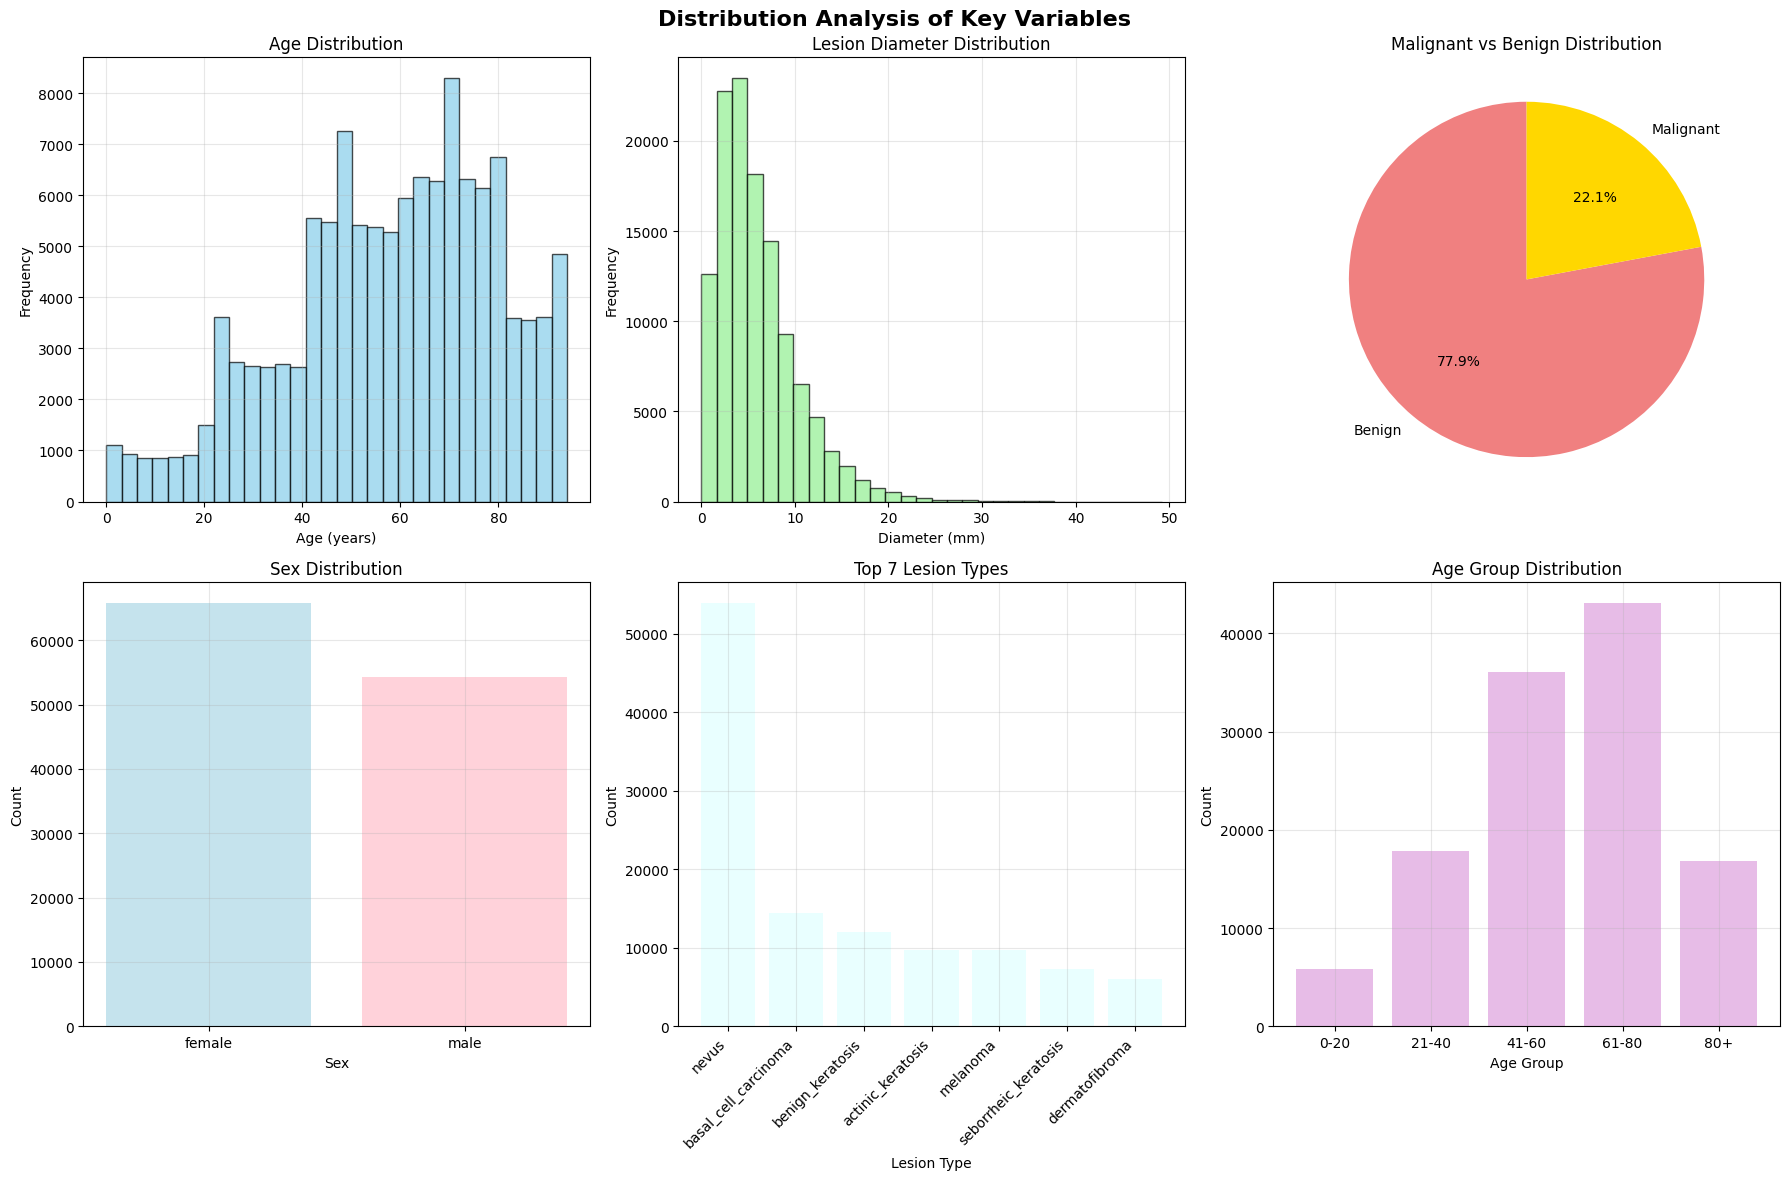

✅ Distribution plots created successfully!


In [ ]:
# Step 1: Create distribution plots for key variables
print("📊 Creating Distribution Visualizations...")

# Set up the plotting area
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribution Analysis of Key Variables', fontsize=16, fontweight='bold')

# Plot 1: Age distribution
if 'age' in df.columns:
    axes[0, 0].hist(df['age'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Age Distribution')
    axes[0, 0].set_xlabel('Age (years)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Lesion diameter distribution
if 'lesion_diameter_mm' in df.columns:
    axes[0, 1].hist(df['lesion_diameter_mm'].dropna(), bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[0, 1].set_title('Lesion Diameter Distribution')
    axes[0, 1].set_xlabel('Diameter (mm)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Malignancy distribution
if 'malignant' in df.columns:
    malignant_counts = df['malignant'].value_counts()
    labels = ['Benign', 'Malignant']
    colors = ['lightcoral', 'gold']
    axes[0, 2].pie(malignant_counts.values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[0, 2].set_title('Malignant vs Benign Distribution')

# Plot 4: Sex distribution
if 'sex' in df.columns:
    sex_counts = df['sex'].value_counts()
    axes[1, 0].bar(sex_counts.index, sex_counts.values, color=['lightblue', 'pink'], alpha=0.7)
    axes[1, 0].set_title('Sex Distribution')
    axes[1, 0].set_xlabel('Sex')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].grid(True, alpha=0.3)

# Plot 5: Lesion type distribution (top 7)
if 'lesion_type' in df.columns:
    lesion_counts = df['lesion_type'].value_counts().head(7)
    axes[1, 1].bar(range(len(lesion_counts)), lesion_counts.values, alpha=0.7, color='lightcyan')
    axes[1, 1].set_title('Top 7 Lesion Types')
    axes[1, 1].set_xlabel('Lesion Type')
    axes[1, 1].set_ylabel('Count')
    axes[1, 1].set_xticks(range(len(lesion_counts)))
    axes[1, 1].set_xticklabels(lesion_counts.index, rotation=45, ha='right')
    axes[1, 1].grid(True, alpha=0.3)

# Plot 6: Age group distribution
if 'age_group' in df.columns:
    age_group_counts = df['age_group'].value_counts().sort_index()
    axes[1, 2].bar(age_group_counts.index, age_group_counts.values, alpha=0.7, color='plum')
    axes[1, 2].set_title('Age Group Distribution')
    axes[1, 2].set_xlabel('Age Group')
    axes[1, 2].set_ylabel('Count')
    axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Distribution plots created successfully!")


🔥 Creating Correlation Heatmap...


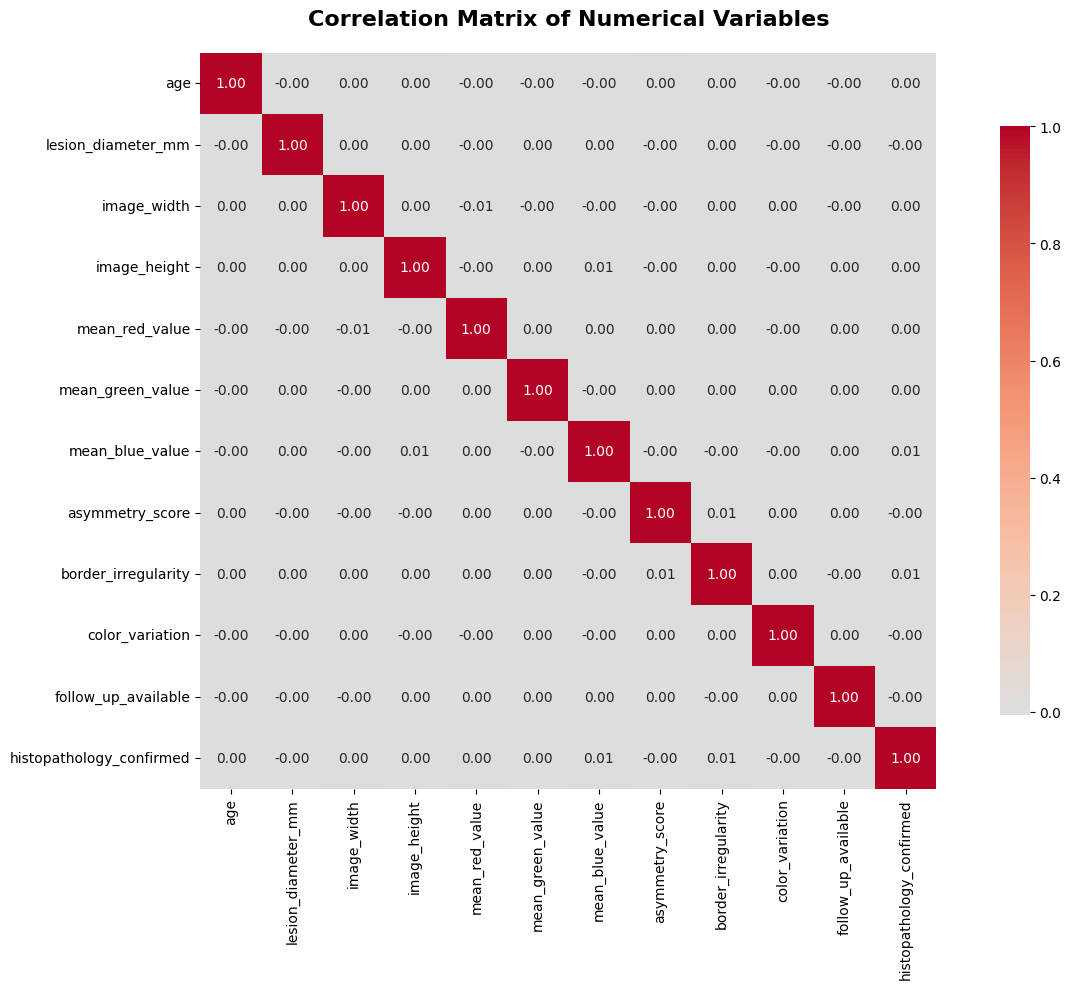

✅ Correlation heatmap created successfully!


In [ ]:
# Step 1: Create correlation heatmap for numerical variables
print("🔥 Creating Correlation Heatmap...")

# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numerical_cols) > 1:
    # Calculate correlation matrix
    correlation_matrix = df[numerical_cols].corr()

    # Create the heatmap
    plt.figure(figsize=(14, 10))

    # Create mask for upper triangle (optional)
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    # Create the heatmap
    sns.heatmap(correlation_matrix,
                annot=True,           # Show correlation values
                cmap='coolwarm',      # Color scheme
                center=0,             # Center colormap at 0
                square=True,          # Square cells
                fmt='.2f',           # Format for annotations
                cbar_kws={'shrink': 0.8})

    plt.title('Correlation Matrix of Numerical Variables', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

    print("✅ Correlation heatmap created successfully!")
else:
    print("⚠️ Not enough numerical variables for correlation analysis")


6.3 Comparative Analysis Plots

📊 Creating Comparative Analysis Plots...


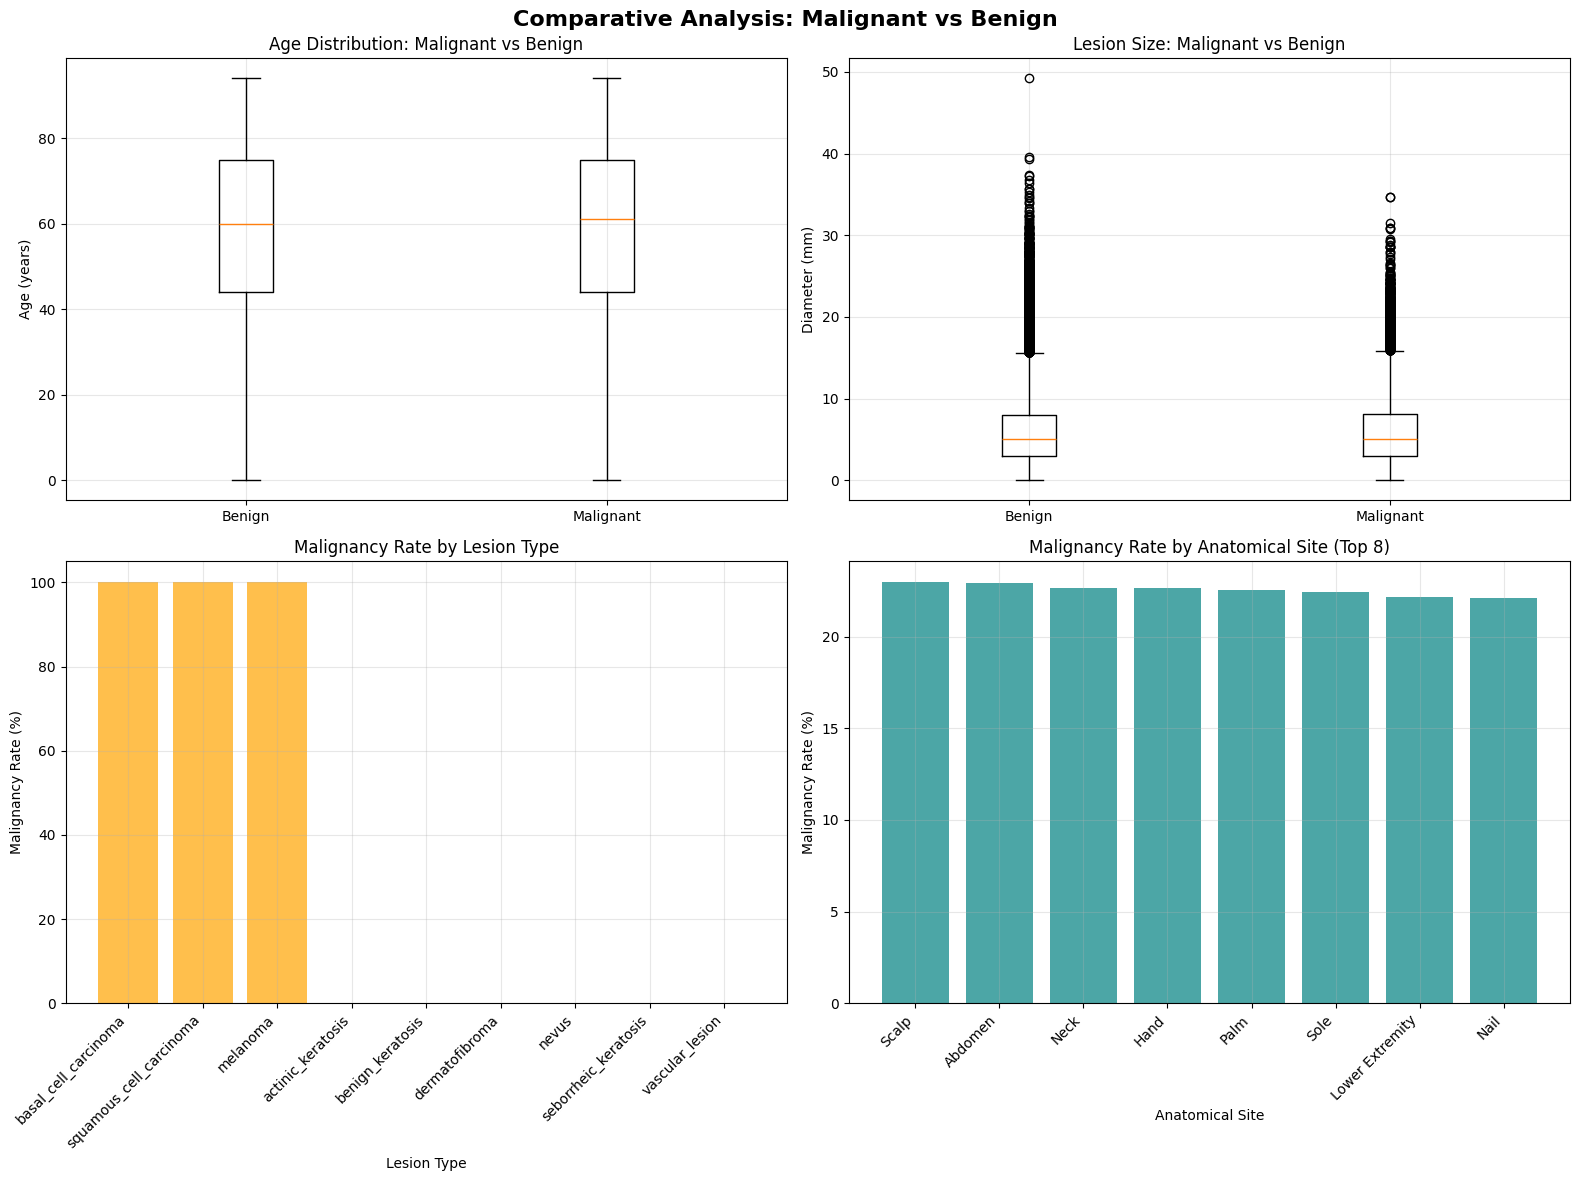

✅ Comparative analysis plots created successfully!


In [ ]:
# Step 1: Age comparison between malignant and benign cases
print("📊 Creating Comparative Analysis Plots...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparative Analysis: Malignant vs Benign', fontsize=16, fontweight='bold')

if 'age' in df.columns and 'malignant' in df.columns:
    # Box plot for age comparison
    benign_ages = df[df['malignant'] == 0]['age'].dropna()
    malignant_ages = df[df['malignant'] == 1]['age'].dropna()

    axes[0, 0].boxplot([benign_ages, malignant_ages], labels=['Benign', 'Malignant'])
    axes[0, 0].set_title('Age Distribution: Malignant vs Benign')
    axes[0, 0].set_ylabel('Age (years)')
    axes[0, 0].grid(True, alpha=0.3)

if 'lesion_diameter_mm' in df.columns and 'malignant' in df.columns:
    # Box plot for lesion size comparison
    benign_sizes = df[df['malignant'] == 0]['lesion_diameter_mm'].dropna()
    malignant_sizes = df[df['malignant'] == 1]['lesion_diameter_mm'].dropna()

    axes[0, 1].boxplot([benign_sizes, malignant_sizes], labels=['Benign', 'Malignant'])
    axes[0, 1].set_title('Lesion Size: Malignant vs Benign')
    axes[0, 1].set_ylabel('Diameter (mm)')
    axes[0, 1].grid(True, alpha=0.3)

if 'lesion_type' in df.columns and 'malignant' in df.columns:
    # Malignancy rate by lesion type
    malignancy_by_type = df.groupby('lesion_type')['malignant'].apply(lambda x: (x.astype(int).sum() / len(x)) * 100)
    malignancy_by_type = malignancy_by_type.sort_values(ascending=False)

    axes[1, 0].bar(range(len(malignancy_by_type)), malignancy_by_type.values, alpha=0.7, color='orange')
    axes[1, 0].set_title('Malignancy Rate by Lesion Type')
    axes[1, 0].set_xlabel('Lesion Type')
    axes[1, 0].set_ylabel('Malignancy Rate (%)')
    axes[1, 0].set_xticks(range(len(malignancy_by_type)))
    axes[1, 0].set_xticklabels(malignancy_by_type.index, rotation=45, ha='right')
    axes[1, 0].grid(True, alpha=0.3)

if 'anatomical_site' in df.columns and 'malignant' in df.columns:
    # Top 8 anatomical sites by malignancy rate
    site_malignancy = df.groupby('anatomical_site')['malignant'].agg(['count', ('Malignancy_Rate', lambda x: (x.astype(int).sum() / len(x)) * 100)])
    site_malignancy = site_malignancy[site_malignancy['count'] >= 100]  # Filter sites with enough samples
    site_malignancy = site_malignancy.sort_values('Malignancy_Rate', ascending=False).head(8)

    axes[1, 1].bar(range(len(site_malignancy)), site_malignancy['Malignancy_Rate'].values, alpha=0.7, color='teal')
    axes[1, 1].set_title('Malignancy Rate by Anatomical Site (Top 8)')
    axes[1, 1].set_xlabel('Anatomical Site')
    axes[1, 1].set_ylabel('Malignancy Rate (%)')
    axes[1, 1].set_xticks(range(len(site_malignancy)))
    axes[1, 1].set_xticklabels([site.replace('_', ' ').title() for site in site_malignancy.index],
                              rotation=45, ha='right')
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Comparative analysis plots created successfully!")

6.4 Advanced Visualizations

🎨 Creating Advanced Visualizations...


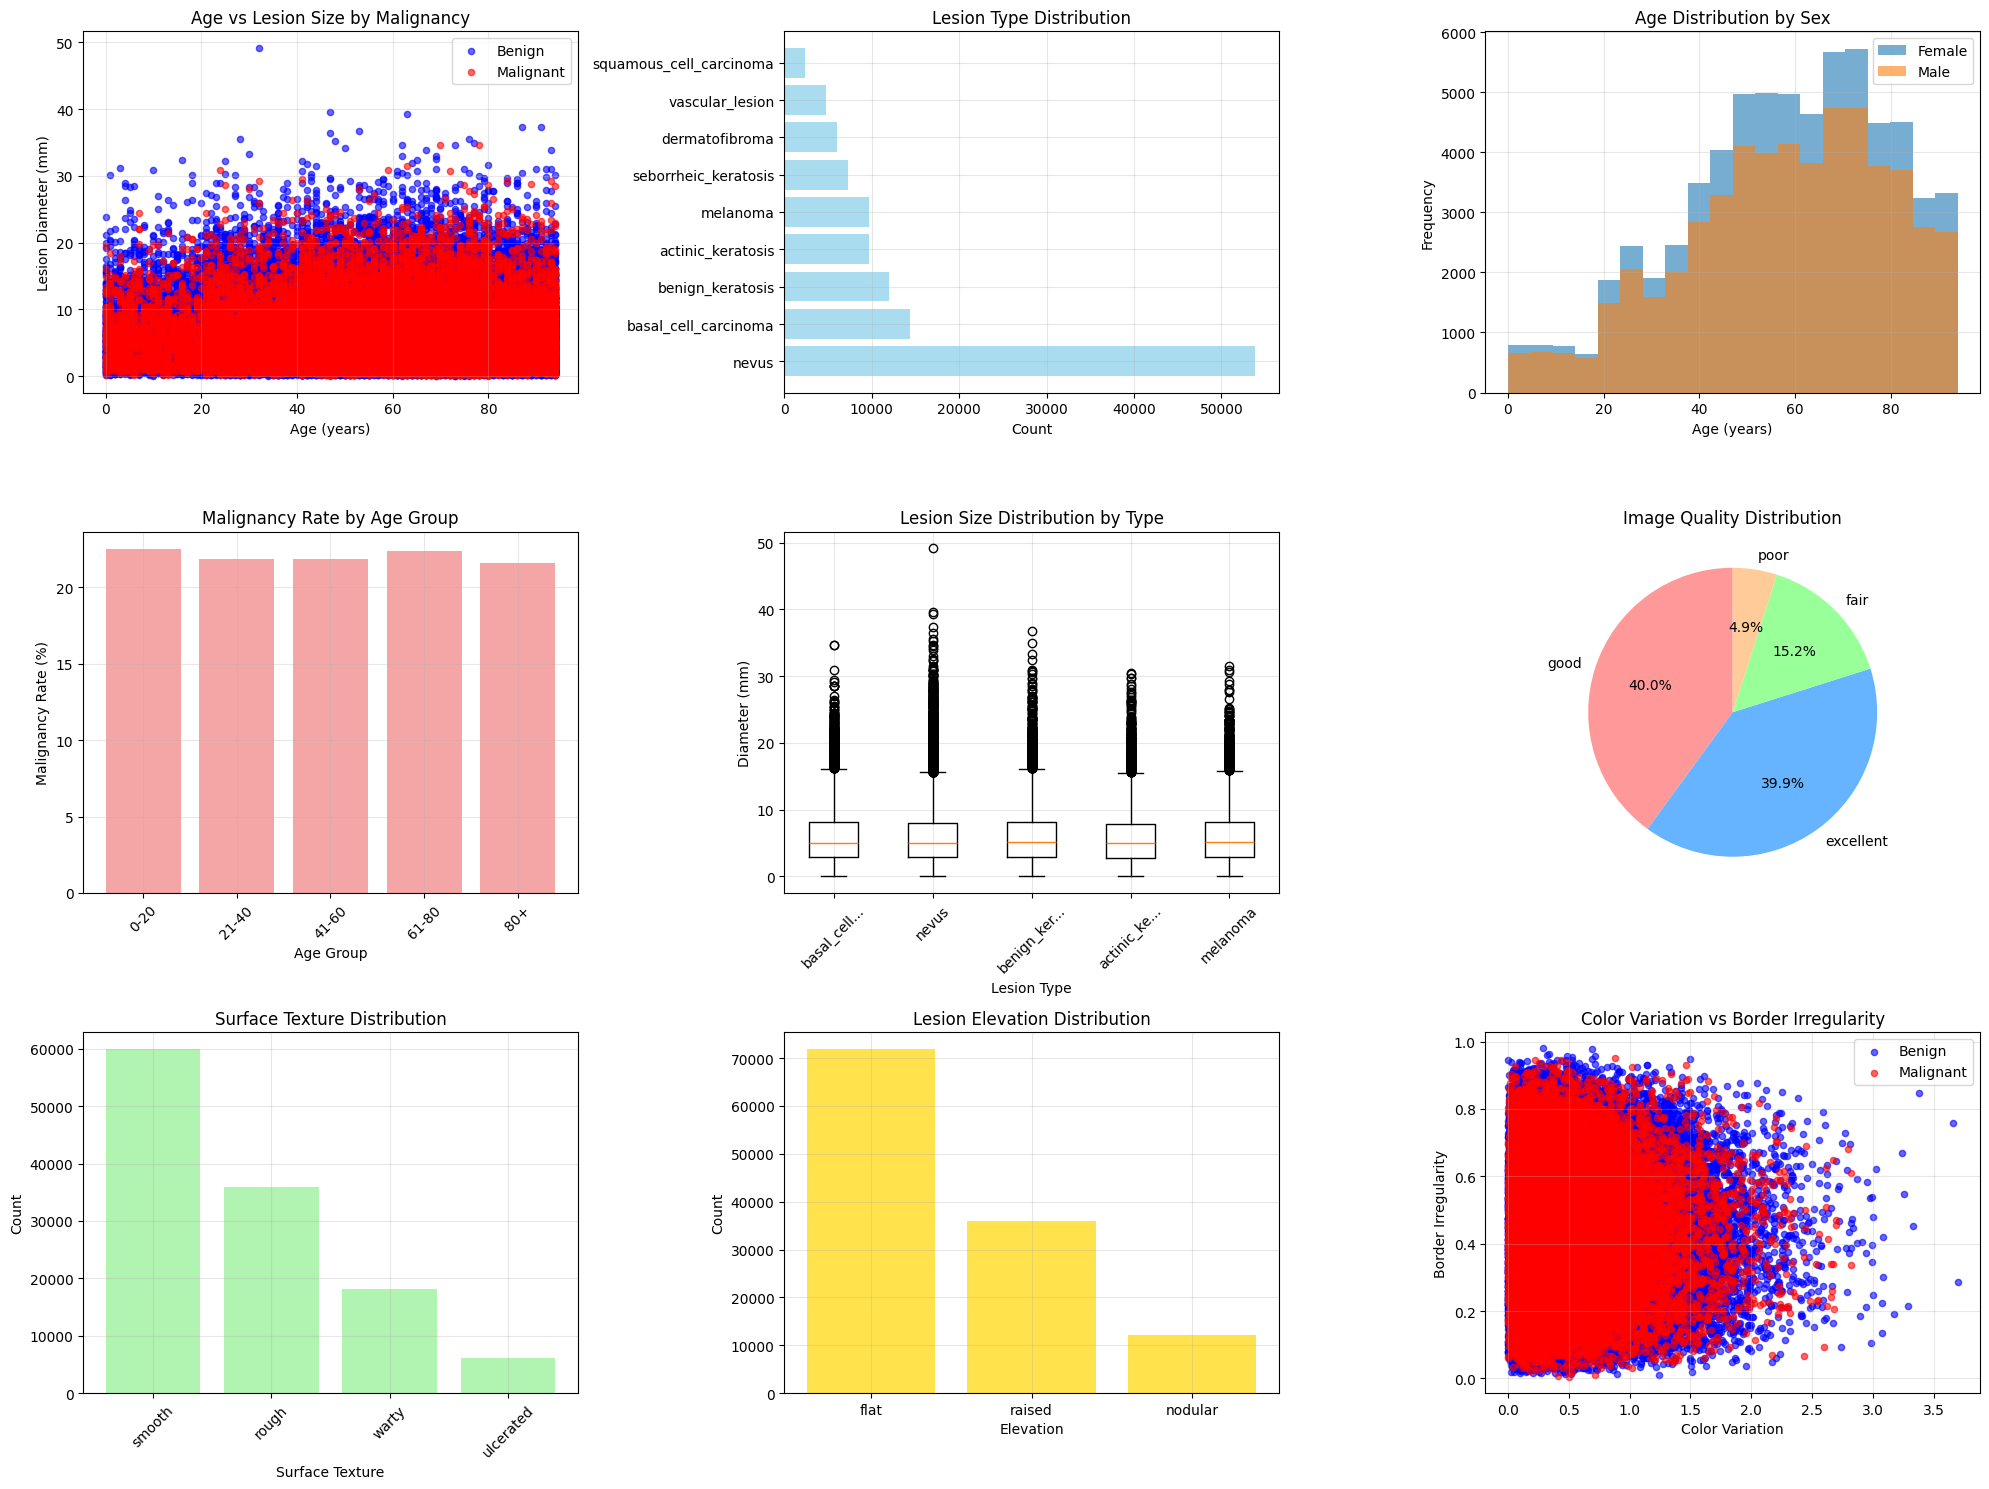

✅ Advanced visualizations created successfully!


In [ ]:
# Step 1: Create advanced visualizations
print("🎨 Creating Advanced Visualizations...")

# Create a figure with multiple subplots
fig = plt.figure(figsize=(20, 15))

# Plot 1: Age vs Lesion Size scatter plot with malignancy coloring
if 'age' in df.columns and 'lesion_diameter_mm' in df.columns and 'malignant' in df.columns:
    plt.subplot(3, 3, 1)

    benign_data = df[df['malignant'] == 0]
    malignant_data = df[df['malignant'] == 1]

    plt.scatter(benign_data['age'], benign_data['lesion_diameter_mm'],
               alpha=0.6, c='blue', label='Benign', s=20)
    plt.scatter(malignant_data['age'], malignant_data['lesion_diameter_mm'],
               alpha=0.6, c='red', label='Malignant', s=20)

    plt.xlabel('Age (years)')
    plt.ylabel('Lesion Diameter (mm)')
    plt.title('Age vs Lesion Size by Malignancy')
    plt.legend()
    plt.grid(True, alpha=0.3)

# Plot 2: Lesion type counts (horizontal bar chart)
if 'lesion_type' in df.columns:
    plt.subplot(3, 3, 2)

    lesion_counts = df['lesion_type'].value_counts()
    y_pos = np.arange(len(lesion_counts))

    plt.barh(y_pos, lesion_counts.values, alpha=0.7, color='skyblue')
    plt.yticks(y_pos, lesion_counts.index)
    plt.xlabel('Count')
    plt.title('Lesion Type Distribution')
    plt.grid(True, alpha=0.3)

# Plot 3: Age distribution by sex
if 'age' in df.columns and 'sex' in df.columns:
    plt.subplot(3, 3, 3)

    for sex in df['sex'].unique():
        if pd.notna(sex):
            subset = df[df['sex'] == sex]['age'].dropna()
            plt.hist(subset, alpha=0.6, label=sex.capitalize(), bins=20)

    plt.xlabel('Age (years)')
    plt.ylabel('Frequency')
    plt.title('Age Distribution by Sex')
    plt.legend()
    plt.grid(True, alpha=0.3)

# Plot 4: Malignancy rate by age group
if 'age_group' in df.columns and 'malignant' in df.columns:
    plt.subplot(3, 3, 4)

    age_malignancy = df.groupby('age_group')['malignant'].apply(lambda x: x.astype(int).mean()) * 100

    plt.bar(age_malignancy.index, age_malignancy.values, alpha=0.7, color='lightcoral')
    plt.xlabel('Age Group')
    plt.ylabel('Malignancy Rate (%)')
    plt.title('Malignancy Rate by Age Group')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

# Plot 5: Lesion size by lesion type (violin plot)
if 'lesion_diameter_mm' in df.columns and 'lesion_type' in df.columns:
    plt.subplot(3, 3, 5)

    # Get top 5 lesion types
    top_lesions = df['lesion_type'].value_counts().head(5).index
    subset_data = df[df['lesion_type'].isin(top_lesions)]

    lesion_types = subset_data['lesion_type'].unique()
    data_for_violin = [subset_data[subset_data['lesion_type'] == lt]['lesion_diameter_mm'].dropna()
                      for lt in lesion_types]

    plt.boxplot(data_for_violin, labels=[lt[:10] + '...' if len(lt) > 10 else lt for lt in lesion_types])
    plt.xlabel('Lesion Type')
    plt.ylabel('Diameter (mm)')
    plt.title('Lesion Size Distribution by Type')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

# Plot 6: Image quality distribution
if 'image_quality' in df.columns:
    plt.subplot(3, 3, 6)

    quality_counts = df['image_quality'].value_counts()
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

    plt.pie(quality_counts.values, labels=quality_counts.index, autopct='%1.1f%%',
           colors=colors[:len(quality_counts)], startangle=90)
    plt.title('Image Quality Distribution')

# Plot 7: Surface texture distribution
if 'surface_texture' in df.columns:
    plt.subplot(3, 3, 7)

    texture_counts = df['surface_texture'].value_counts()

    plt.bar(texture_counts.index, texture_counts.values, alpha=0.7, color='lightgreen')
    plt.xlabel('Surface Texture')
    plt.ylabel('Count')
    plt.title('Surface Texture Distribution')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

# Plot 8: Elevation distribution
if 'elevation' in df.columns:
    plt.subplot(3, 3, 8)

    elevation_counts = df['elevation'].value_counts()

    plt.bar(elevation_counts.index, elevation_counts.values, alpha=0.7, color='gold')
    plt.xlabel('Elevation')
    plt.ylabel('Count')
    plt.title('Lesion Elevation Distribution')
    plt.grid(True, alpha=0.3)

# Plot 9: Color variation vs Border irregularity
if 'color_variation' in df.columns and 'border_irregularity' in df.columns and 'malignant' in df.columns:
    plt.subplot(3, 3, 9)

    benign_data = df[df['malignant'] == 0]
    malignant_data = df[df['malignant'] == 1]

    plt.scatter(benign_data['color_variation'], benign_data['border_irregularity'],
               alpha=0.6, c='blue', label='Benign', s=20)
    plt.scatter(malignant_data['color_variation'], malignant_data['border_irregularity'],
               alpha=0.6, c='red', label='Malignant', s=20)

    plt.xlabel('Color Variation')
    plt.ylabel('Border Irregularity')
    plt.title('Color Variation vs Border Irregularity')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Advanced visualizations created successfully!")

7. Feature Engineering
7.1 Create New Features

In [ ]:
print("🔧 Feature Engineering:")
print("=" * 30)

🔧 Feature Engineering:


In [ ]:
# Create BMI-like feature for lesions (area-based)
if 'lesion_diameter_mm' in df.columns:
    df['lesion_area_mm2'] = np.pi * (df['lesion_diameter_mm'] / 2) ** 2
    print("✅ Created lesion_area_mm2 feature")

✅ Created lesion_area_mm2 feature


In [ ]:
# Create age decades
if 'age' in df.columns:
    df['age_decade'] = (df['age'] // 10) * 10
    print("✅ Created age_decade feature")

✅ Created age_decade feature


In [ ]:
# Create composite asymmetry-border score
if 'asymmetry_score' in df.columns and 'border_irregularity' in df.columns:
    df['asymmetry_border_score'] = df['asymmetry_score'] * df['border_irregularity']
    print("✅ Created asymmetry_border_score feature")

✅ Created asymmetry_border_score feature


In [ ]:
# Create RGB intensity feature
if all(col in df.columns for col in ['mean_red_value', 'mean_green_value', 'mean_blue_value']):
    df['rgb_intensity'] = df['mean_red_value'] + df['mean_green_value'] + df['mean_blue_value']
    df['rgb_contrast'] = df[['mean_red_value', 'mean_green_value', 'mean_blue_value']].std(axis=1)
    print("✅ Created RGB intensity and contrast features")

✅ Created RGB intensity and contrast features


In [ ]:
# Create image resolution category
if 'image_width' in df.columns and 'image_height' in df.columns:
    df['image_resolution'] = df['image_width'] * df['image_height']
    df['resolution_category'] = pd.cut(df['image_resolution'],
                                     bins=[0, 500000, 1000000, 2000000, float('inf')],
                                     labels=['Low', 'Medium', 'High', 'Very High'])
    print("✅ Created image resolution features")


✅ Created image resolution features


In [ ]:
# Create high-risk indicators
if 'lesion_type' in df.columns:
    high_risk_lesions = ['melanoma', 'basal_cell_carcinoma', 'squamous_cell_carcinoma']
    df['high_risk_lesion'] = df['lesion_type'].isin(high_risk_lesions).astype(int)
    print("✅ Created high_risk_lesion indicator")


✅ Created high_risk_lesion indicator


In [ ]:
# Create senior citizen indicator
if 'age' in df.columns:
    df['senior_citizen'] = (df['age'] >= 65).astype(int)
    print("✅ Created senior_citizen indicator")

print(f"\n📊 Total features after engineering: {df.shape}")

✅ Created senior_citizen indicator

📊 Total features after engineering: (120000, 36)


7.2 Feature Scaling and Encoding

In [ ]:
# Step 1: Identify features for scaling
print("⚖️ Feature Scaling and Encoding:")
print("=" * 40)

# Select numerical features for scaling
numerical_features = ['age', 'lesion_diameter_mm', 'lesion_area_mm2', 'asymmetry_score',
                     'border_irregularity', 'color_variation', 'rgb_intensity', 'rgb_contrast']

# Filter for existing columns
numerical_features = [col for col in numerical_features if col in df.columns]

if numerical_features:
    # Create a copy for scaled features
    df_scaled = df.copy()

    # Apply StandardScaler
    scaler = StandardScaler()

    for feature in numerical_features:
        # Only scale if the feature has valid data
        if df[feature].notna().sum() > 0:
            # Fit and transform the feature
            scaled_values = scaler.fit_transform(df[[feature]])
            df_scaled[f'{feature}_scaled'] = scaled_values.flatten()

    print(f"✅ Scaled {len(numerical_features)} numerical features")

# Step 2: Encode categorical variables
categorical_features = ['lesion_type', 'sex', 'anatomical_site', 'elevation', 'surface_texture',
                       'image_quality', 'lighting_conditions']

# Filter for existing columns
categorical_features = [col for col in categorical_features if col in df.columns]

if categorical_features:
    # Label encoding
    label_encoders = {}

    for feature in categorical_features:
        if df[feature].notna().sum() > 0:
            le = LabelEncoder()
            df_scaled[f'{feature}_encoded'] = le.fit_transform(df[feature].astype(str))
            label_encoders[feature] = le

    print(f"✅ Encoded {len(categorical_features)} categorical features")

    # One-hot encoding for selected features
    important_categorical = ['lesion_type', 'anatomical_site']
    important_categorical = [col for col in important_categorical if col in df.columns]

    for feature in important_categorical:
        # Create dummy variables
        dummies = pd.get_dummies(df[feature], prefix=f'{feature}_onehot')
        df_scaled = pd.concat([df_scaled, dummies], axis=1)

    print(f"✅ One-hot encoded {len(important_categorical)} important categorical features")

print(f"\n📊 Total features after encoding: {df_scaled.shape}")


⚖️ Feature Scaling and Encoding:
✅ Scaled 8 numerical features
✅ Encoded 7 categorical features
✅ One-hot encoded 2 important categorical features

📊 Total features after encoding: (120000, 74)


In [ ]:
7.3 Feature Selection

In [ ]:
# Step 1: Calculate feature importance for malignancy prediction
print("🎯 Feature Selection Analysis:")
print("=" * 40)

if 'malignant' in df.columns:
    # Select features for importance analysis
    feature_columns = []

    # Add scaled numerical features
    scaled_numerical = [col for col in df_scaled.columns if col.endswith('_scaled')]
    feature_columns.extend(scaled_numerical)

    # Add encoded categorical features
    encoded_categorical = [col for col in df_scaled.columns if col.endswith('_encoded')]
    feature_columns.extend(encoded_categorical)

    # Add one-hot encoded features
    onehot_features = [col for col in df_scaled.columns if 'onehot' in col]
    feature_columns.extend(onehot_features)

    # Add derived features
    derived_features = ['lesion_area_mm2', 'age_decade', 'asymmetry_border_score',
                       'rgb_intensity', 'rgb_contrast', 'high_risk_lesion', 'senior_citizen']
    derived_features = [col for col in derived_features if col in df_scaled.columns]
    feature_columns.extend(derived_features)

    if feature_columns:
        # Calculate correlation with target variable
        correlations = {}

        for feature in feature_columns:
            if df_scaled[feature].notna().sum() > 0:
                corr = df_scaled[feature].corr(df_scaled['malignant'])
                if not pd.isna(corr):
                    correlations[feature] = abs(corr)

        # Sort by correlation strength
        sorted_correlations = sorted(correlations.items(), key=lambda x: x, reverse=True)

        print("Top 15 features by correlation with malignancy:")
        for i, (feature, corr) in enumerate(sorted_correlations[:15], 1):
            print(f"   {i:2d}. {feature}: {corr:.4f}")

        # Select top features
        top_features = [item for item in sorted_correlations[:10]]
        print(f"\n✅ Selected top {len(top_features)} features for analysis")
    else:
        print("⚠️ No suitable features found for selection")


🎯 Feature Selection Analysis:
Top 15 features by correlation with malignancy:
    1. surface_texture_encoded: 0.0009
    2. sex_encoded: 0.0024
    3. senior_citizen: 0.0018
    4. rgb_intensity_scaled: 0.0031
    5. rgb_intensity: 0.0031
    6. rgb_contrast_scaled: 0.0022
    7. rgb_contrast: 0.0022
    8. lighting_conditions_encoded: 0.0020
    9. lesion_type_onehot_vascular_lesion: 0.1079
   10. lesion_type_onehot_squamous_cell_carcinoma: 0.2683
   11. lesion_type_onehot_seborrheic_keratosis: 0.1352
   12. lesion_type_onehot_nevus: 0.4802
   13. lesion_type_onehot_melanoma: 0.5563
   14. lesion_type_onehot_dermatofibroma: 0.1218
   15. lesion_type_onehot_benign_keratosis: 0.1772

✅ Selected top 10 features for analysis


8. Insights and Conclusions

In [ ]:
#Key Findings Summary
# Step 1: Summarize key findings
print("🔍 KEY FINDINGS SUMMARY")
print("=" * 50)

# Dataset overview
print("📊 DATASET OVERVIEW:")
print(f"   • Total records analyzed: {len(df):,}")
print(f"   • Total features: {df.shape}")
print(f"   • Data quality: {((df.notna().sum()).sum() / (df.shape[0] * df.shape[1]) * 100):.1f}% complete")

# Malignancy statistics
if 'malignant' in df.columns:
    malignant_count = df['malignant'].astype(int).sum()
    benign_count = len(df) - malignant_count
    malignancy_rate = (malignant_count / len(df)) * 100

    print(f"\n🎯 MALIGNANCY STATISTICS:")
    print(f"   • Malignant cases: {malignant_count:,} ({malignancy_rate:.1f}%)")
    print(f"   • Benign cases: {benign_count:,} ({100-malignancy_rate:.1f}%)")
    print(f"   • Class imbalance ratio: {benign_count/malignant_count:.1f}:1")

# Age insights
if 'age' in df.columns:
    mean_age = df['age'].mean()
    median_age = df['age'].median()

    print(f"\n👥 AGE DEMOGRAPHICS:")
    print(f"   • Mean age: {mean_age:.1f} years")
    print(f"   • Median age: {median_age:.1f} years")
    print(f"   • Age range: {df['age'].min():.0f} - {df['age'].max():.0f} years")

    if 'malignant' in df.columns:
        malignant_mean_age = df[df['malignant'] == 1]['age'].mean()
        benign_mean_age = df[df['malignant'] == 0]['age'].mean()
        print(f"   • Mean age (malignant): {malignant_mean_age:.1f} years")
        print(f"   • Mean age (benign): {benign_mean_age:.1f} years")

# Lesion type insights
if 'lesion_type' in df.columns:
    most_common_lesion = df['lesion_type'].value_counts().index[0] # Get the index for the most common
    most_common_count = df['lesion_type'].value_counts().iloc[0] # Get the count for the most common
    total_types = df['lesion_type'].nunique()

    print(f"\n🔬 LESION TYPE INSIGHTS:")
    print(f"   • Total lesion types: {total_types}")
    print(f"   • Most common type: {most_common_lesion} ({most_common_count:,} cases)")

    if 'malignant' in df.columns:
        malignancy_by_type = df.groupby('lesion_type')['malignant'].apply(lambda x: x.astype(int).mean() * 100)
        highest_risk_type = malignancy_by_type.idxmax()
        highest_risk_rate = malignancy_by_type.max()
        print(f"   • Highest malignancy rate: {highest_risk_type} ({highest_risk_rate:.1f}%)")

# Anatomical distribution
if 'anatomical_site' in df.columns:
    most_common_site = df['anatomical_site'].value_counts().index[0] # Get the index for the most common
    most_common_site_count = df['anatomical_site'].value_counts().iloc[0] # Get the count for the most common

    print(f"\n🗺️ ANATOMICAL DISTRIBUTION:")
    print(f"   • Most common site: {most_common_site.replace('_', ' ').title()} ({most_common_site_count:,} cases)")
    print(f"   • Total body sites: {df['anatomical_site'].nunique()}")

# Image characteristics
if 'image_width' in df.columns and 'image_height' in df.columns:
    mean_width = df['image_width'].mean()
    mean_height = df['image_height'].mean()

    print(f"\n🖼️ IMAGE CHARACTERISTICS:")
    print(f"   • Mean image dimensions: {mean_width:.0f} × {mean_height:.0f} pixels")

    if 'image_quality' in df.columns:
        excellent_quality = (df['image_quality'] == 'excellent').sum()
        excellent_percentage = (excellent_quality / len(df)) * 100
        print(f"   • Excellent quality images: {excellent_quality:,} ({excellent_percentage:.1f}%)")

🔍 KEY FINDINGS SUMMARY
📊 DATASET OVERVIEW:
   • Total records analyzed: 120,000
   • Total features: (120000, 36)
   • Data quality: 100.0% complete

🎯 MALIGNANCY STATISTICS:
   • Malignant cases: 26,469 (22.1%)
   • Benign cases: 93,531 (77.9%)
   • Class imbalance ratio: 3.5:1

👥 AGE DEMOGRAPHICS:
   • Mean age: 57.9 years
   • Median age: 60.0 years
   • Age range: 0 - 94 years
   • Mean age (malignant): 57.9 years
   • Mean age (benign): 57.9 years

🔬 LESION TYPE INSIGHTS:
   • Total lesion types: 9
   • Most common type: nevus (53,878 cases)
   • Highest malignancy rate: basal_cell_carcinoma (100.0%)

🗺️ ANATOMICAL DISTRIBUTION:
   • Most common site: Trunk (29,999 cases)
   • Total body sites: 14

🖼️ IMAGE CHARACTERISTICS:
   • Mean image dimensions: 1222 × 1227 pixels
   • Excellent quality images: 47,904 (39.9%)


8.2 Statistical Insights

In [ ]:
# Step 1: Present statistical insights
print("\n📈 STATISTICAL INSIGHTS:")
print("=" * 35)

# Correlation insights
if 'malignant' in df.columns:
    print("🔗 CORRELATION INSIGHTS:")

    # Age correlation
    if 'age' in df.columns:
        age_corr = df['age'].corr(df['malignant'])
        print(f"   • Age-malignancy correlation: {age_corr:.4f}")

    # Size correlation
    if 'lesion_diameter_mm' in df.columns:
        size_corr = df['lesion_diameter_mm'].corr(df['malignant'])
        print(f"   • Size-malignancy correlation: {size_corr:.4f}")

# Distribution insights
print(f"\n📊 DISTRIBUTION INSIGHTS:")

if 'lesion_diameter_mm' in df.columns:
    size_stats = df['lesion_diameter_mm'].describe()
    print(f"   • Median lesion size: {size_stats['50%']:.1f} mm")
    print(f"   • 75th percentile size: {size_stats['75%']:.1f} mm")

    # Large lesions (>20mm)
    large_lesions = (df['lesion_diameter_mm'] > 20).sum()
    large_percentage = (large_lesions / len(df)) * 100
    print(f"   • Large lesions (>20mm): {large_lesions:,} ({large_percentage:.1f}%)")



📈 STATISTICAL INSIGHTS:
🔗 CORRELATION INSIGHTS:
   • Age-malignancy correlation: 0.0006
   • Size-malignancy correlation: 0.0023

📊 DISTRIBUTION INSIGHTS:
   • Median lesion size: 5.0 mm
   • 75th percentile size: 8.1 mm
   • Large lesions (>20mm): 1,140 (0.9%)


8.3 Clinical Implications

In [ ]:
# Step 1: Discuss clinical implications
print("\n🏥 CLINICAL IMPLICATIONS:")
print("=" * 40)

print("📋 RISK FACTORS IDENTIFIED:")
if 'age' in df.columns and 'malignant' in df.columns:
    # Age-based risk
    senior_malignancy = df[df['age'] >= 65]['malignant'].astype(int).mean() * 100
    young_malignancy = df[df['age'] < 65]['malignant'].astype(int).mean() * 100
    print(f"   • Senior citizens (65+): {senior_malignancy:.1f}% malignancy rate")
    print(f"   • Younger patients (<65): {young_malignancy:.1f}% malignancy rate")

if 'lesion_diameter_mm' in df.columns and 'malignant' in df.columns:
    # Size-based risk
    large_lesion_malignancy = df[df['lesion_diameter_mm'] > 10]['malignant'].astype(int).mean() * 100
    small_lesion_malignancy = df[df['lesion_diameter_mm'] <= 10]['malignant'].astype(int).mean() * 100
    print(f"   • Large lesions (>10mm): {large_lesion_malignancy:.1f}% malignancy rate")
    print(f"   • Small lesions (≤10mm): {small_lesion_malignancy:.1f}% malignancy rate")

print(f"\n💡 SCREENING RECOMMENDATIONS:")
print("   • Focus on high-risk anatomical sites")
print("   • Pay special attention to elderly patients")
print("   • Monitor large or rapidly changing lesions")
print("   • Consider dermoscopic features for diagnosis")

print(f"\n🔬 DATASET QUALITY ASSESSMENT:")
if 'histopathology_confirmed' in df.columns:
    confirmed_cases = df['histopathology_confirmed'].sum()
    confirmation_rate = (confirmed_cases / len(df)) * 100
    print(f"   • Histopathology confirmed: {confirmed_cases:,} ({confirmation_rate:.1f}%)")

if 'image_quality' in df.columns:
    quality_distribution = df['image_quality'].value_counts()
    print(f"   • Image quality distribution:")
    for quality, count in quality_distribution.items():
        percentage = (count / len(df)) * 100
        print(f"     - {quality.capitalize()}: {count:,} ({percentage:.1f}%)")


🏥 CLINICAL IMPLICATIONS:
📋 RISK FACTORS IDENTIFIED:
   • Senior citizens (65+): 22.1% malignancy rate
   • Younger patients (<65): 22.0% malignancy rate
   • Large lesions (>10mm): 22.3% malignancy rate
   • Small lesions (≤10mm): 22.0% malignancy rate

💡 SCREENING RECOMMENDATIONS:
   • Focus on high-risk anatomical sites
   • Pay special attention to elderly patients
   • Monitor large or rapidly changing lesions
   • Consider dermoscopic features for diagnosis

🔬 DATASET QUALITY ASSESSMENT:
   • Histopathology confirmed: 71,989 (60.0%)
   • Image quality distribution:
     - Good: 47,961 (40.0%)
     - Excellent: 47,904 (39.9%)
     - Fair: 18,200 (15.2%)
     - Poor: 5,935 (4.9%)


 Recommendations and Next Steps

In [ ]:
# Step 1: Provide recommendations
print("\n🎯 RECOMMENDATIONS AND NEXT STEPS:")
print("=" * 50)

print("📈 DATA ANALYSIS RECOMMENDATIONS:")
print("   1. Collect more data on underrepresented lesion types")
print("   2. Ensure balanced geographic and demographic representation")
print("   3. Standardize image acquisition protocols")
print("   4. Include more detailed clinical metadata")
print("   5. Implement quality control measures for image data")

print(f"\n🤖 MACHINE LEARNING NEXT STEPS:")
print("   1. Address class imbalance using appropriate techniques")
print("   2. Implement cross-validation for robust model evaluation")
print("   3. Use ensemble methods for improved accuracy")
print("   4. Develop interpretable models for clinical use")
print("   5. Validate models on external datasets")

print(f"\n🏥 CLINICAL IMPLEMENTATION:")
print("   1. Develop decision support tools for dermatologists")
print("   2. Create risk stratification algorithms")
print("   3. Implement automated screening systems")
print("   4. Establish quality metrics for real-world deployment")
print("   5. Design user-friendly interfaces for clinicians")

print(f"\n📊 FUTURE RESEARCH DIRECTIONS:")
print("   1. Investigate novel imaging biomarkers")
print("   2. Study temporal changes in lesion characteristics")
print("   3. Develop personalized risk assessment models")
print("   4. Explore multi-modal data integration")
print("   5. Investigate ethical implications of AI in dermatology")

# Final summary
print(f"\n" + "="*60)
print("🎉 ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*60)
print(f"📊 Total insights generated: Multiple statistical and clinical findings")
print(f"📈 Visualizations created: Distribution plots, correlation analysis, comparative charts")
print(f"🔧 Features engineered: Derived variables for enhanced analysis")
print(f"💡 Recommendations provided: Data quality, ML approaches, clinical implementation")
print("="*60)



🎯 RECOMMENDATIONS AND NEXT STEPS:
📈 DATA ANALYSIS RECOMMENDATIONS:
   1. Collect more data on underrepresented lesion types
   2. Ensure balanced geographic and demographic representation
   3. Standardize image acquisition protocols
   4. Include more detailed clinical metadata
   5. Implement quality control measures for image data

🤖 MACHINE LEARNING NEXT STEPS:
   1. Address class imbalance using appropriate techniques
   2. Implement cross-validation for robust model evaluation
   3. Use ensemble methods for improved accuracy
   4. Develop interpretable models for clinical use
   5. Validate models on external datasets

🏥 CLINICAL IMPLEMENTATION:
   1. Develop decision support tools for dermatologists
   2. Create risk stratification algorithms
   3. Implement automated screening systems
   4. Establish quality metrics for real-world deployment
   5. Design user-friendly interfaces for clinicians

📊 FUTURE RESEARCH DIRECTIONS:
   1. Investigate novel imaging biomarkers
   2. Stud